In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
import math

In [39]:
bild1 = imread("Downloads/bildverbesserung/bild1.png").astype(np.float)
bild2 = imread("Downloads/bildverbesserung/bild2.png").astype(np.float)
bild3 = imread("Downloads/bildverbesserung/bild3.png").astype(np.float)

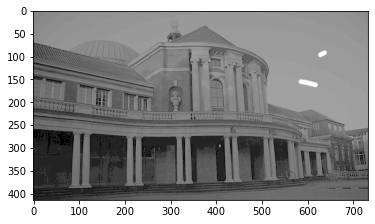

In [3]:
#Aufgabenteil 1
#Es wurde eine Logarithmus-Transformation angewendet, um die dunkleren Bereiche
#stärker von einander abzugrenzen

c = 255/(np.log(1 + np.max(bild1)))
bild1Improved = c * np.log(bild1 + 1)
bild1Improved = bild1Improved.astype(np.uint8)
plt.imshow(bild1Improved, cmap="Greys_r", vmin=0, vmax=255)

#Teile des Himmels wurden durch die 2 Bildfehler verdeckt

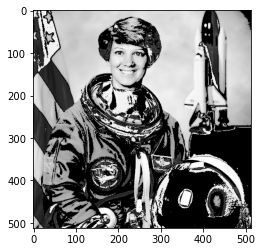

In [4]:
#Aufgabenteil 2
#welches alle Pixel in einen bestimmten Wertebereich (in diesem Fall zwischen 64 und 128) auf 0 setzt.

def levelSlicing(pixel, l, h):
    if pixel > l and pixel < h:
        return 0
    return pixel

thres1 = 64
thres2 = 128
bild2Improved = np.vectorize(levelSlicing)(bild2, thres1, thres2)
bild2Improved = bild2Improved.astype(np.uint8)
plt.imshow(bild2Improved, cmap="Greys_r", vmin=0, vmax=255)
plt.imsave("bild2Improved.png", bild2Improved, cmap="Greys_r", vmin=0, vmax=255)

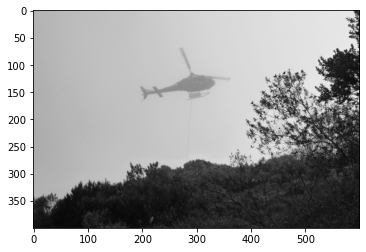

In [42]:
#Aufgabenteil 3
#Hier wollen nach dem Invertieren Contrast-Stretching anwenden
'''
bild3Improved = (bild3 - np.min(bild3)) / (np.max(bild3) - np.min(bild3)) * 255
bild3Improved = bild3Improved.astype(np.uint8)
plt.imshow(bild3Improved, cmap="Greys_r", vmin=0, vmax=255)
'''

image_np = np.array(bild3)
inverted_image = 255 - image_np


inverted_image = inverted_image.astype(np.uint8)
plt.imshow(inverted_image, cmap="Greys_r", vmin=0, vmax=255)


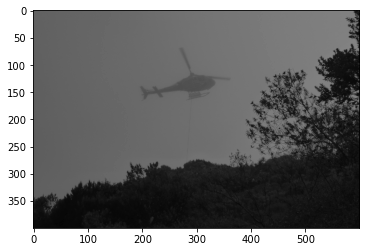

In [43]:
bild3_final = np.array(inverted_image)

min_value = np.min(bild3_final)
max_value = np.max(bild3_final)
stretch_factor = 0.5

# Anpassung der Intensitätswerte unter Berücksichtigung der Umgebung
bild3_final = (bild3_final - min_value) * stretch_factor + min_value

bild3_final = np.clip(bild3_final, 0, 255)
plt.imshow(bild3_final, cmap="Greys_r", vmin=0, vmax=255)